# Import Libraries/Data

In [1]:
import pandas as pd
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
import warnings
pd.set_option('display.max_columns',None)

In [2]:
with open('data/full_data.pkl','rb') as f:
    df = pkl.load(f)
dfr = pd.read_csv('data/ridership.csv')

In [3]:
# drop excess columns
df.drop(['all_delays','delayed_stations','between_stations','date'],axis=1,inplace=True)

# Checking Correlation

In [4]:
# setting df ready for correlation testing
delays_df = df[['delayed_div_a','delayed_div_b','bronx', 'brooklyn', 'manhattan', 'queens', 'direction_bronx',
                'direction_brooklyn', 'direction_manhattan','direction_queens', 'direction_both', 'direction_north',
                'direction_south', 'passenger_disruption','station_integrity_disruption', 'mechanical_and_track_disruption',
                'train_disruption', 'weather_disruption','signal_disruption', 'switch_disruption', 'mon', 'tue', 'wed',
                'th', 'fri', 'weekend', 'holiday', 'rush_hour','max_temp', 'avg_temp', 'min_temp', 'avg_wind_spd', 
                'fastest_wind_directions', 'fastest_wind_spd', 'major_conditions','minor_conditions', 'neutral_conditions',
                'clear_conditions', 'prcp', 'snowfall', 'snowfall_depth']]

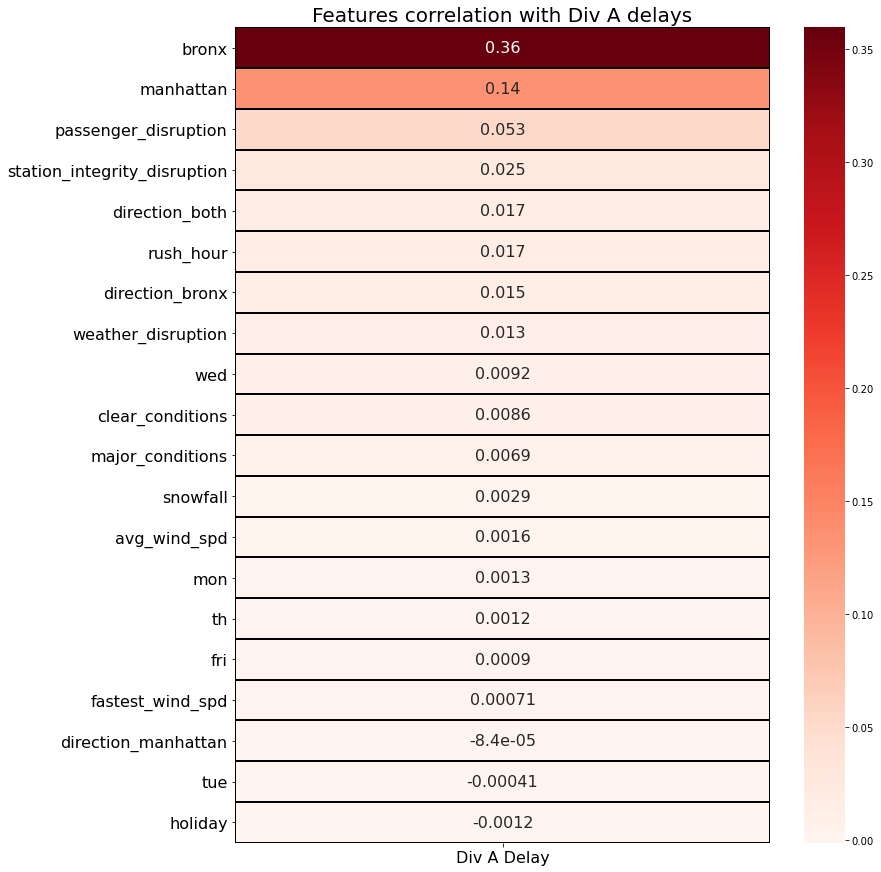

In [5]:
# correlation heatmap - div a
corr = delays_df.corr().drop(['delayed_div_a','delayed_div_b'])
x=corr[['delayed_div_a']]
fig, ax = plt.subplots(figsize=(12,15))
sns.heatmap(x.sort_values(by=['delayed_div_a'],ascending=0)[:20],
           annot=True,
           cmap='Reds',
           annot_kws={'fontsize':16},
           linewidth=2,
           linecolor='black',
           #yticklabels=y_labels,
           xticklabels=['Div A Delay']);
ax.set_title('Features correlation with Div A delays',size=20)
ax.tick_params(labelsize=16)

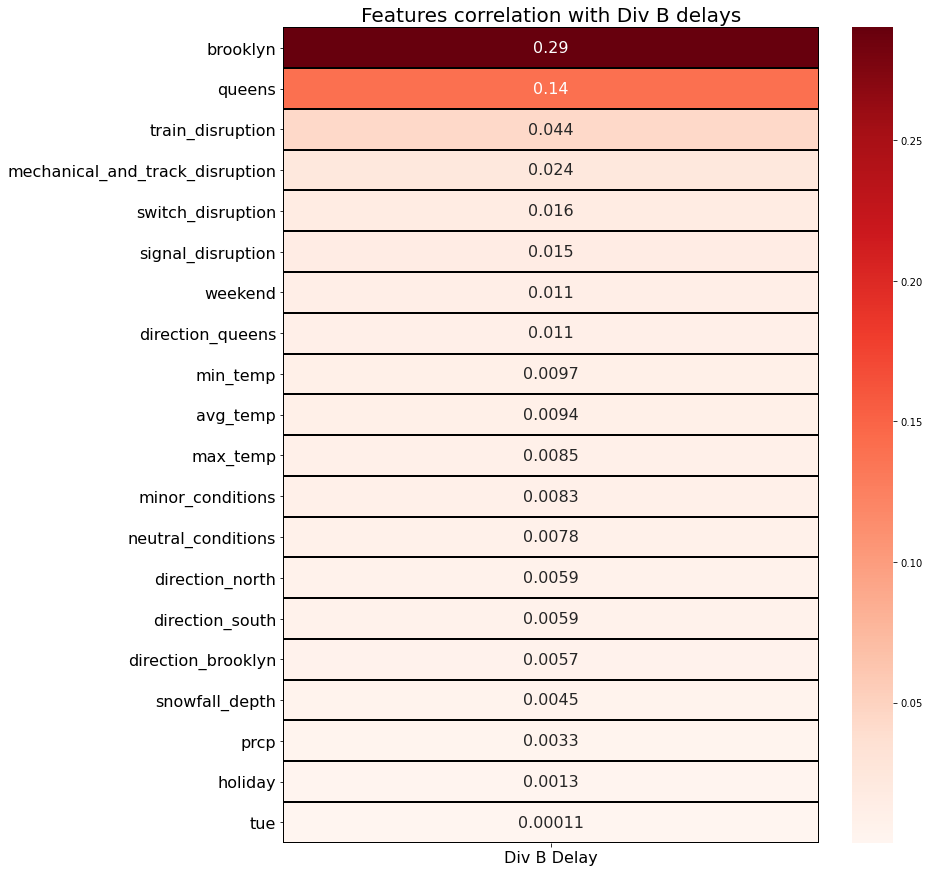

In [6]:
# correlation heatmap - div b
corr = delays_df.corr().drop(['delayed_div_a','delayed_div_b'])
x=corr[['delayed_div_b']]
fig, ax = plt.subplots(figsize=(12,15))
sns.heatmap(x.sort_values(by=['delayed_div_b'],ascending=0)[:20],
           annot=True,
           cmap='Reds',
           annot_kws={'fontsize':16},
           linewidth=2,
           linecolor='black',
           #yticklabels=y_labels,
           xticklabels=['Div B Delay']);
ax.set_title('Features correlation with Div B delays',size=20)
ax.tick_params(labelsize=16)

# Checking causes

In [7]:
causes = df[['delayed_div_a','delayed_div_b','passenger_disruption','station_integrity_disruption',
             'mechanical_and_track_disruption','train_disruption', 'weather_disruption','signal_disruption', 'switch_disruption']]
div_a_causes = causes.loc[causes['delayed_div_a']==1]
div_a_causes.drop(['delayed_div_a','delayed_div_b'],axis=1,inplace=True)
div_b_causes = causes.loc[causes['delayed_div_b']==1]
div_b_causes.drop(['delayed_div_a','delayed_div_b'],axis=1,inplace=True)
causes.drop(['delayed_div_a','delayed_div_b'],axis=1,inplace=True)
warnings.filterwarnings('ignore')

C:\Users\sethk\anaconda3\envs\mta_env\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Causes of delays on Div A

In [8]:
div_a_causes = div_a_causes.reindex(columns=['mechanical_and_track_disruption','passenger_disruption','weather_disruption',
                                             'signal_disruption','train_disruption','station_integrity_disruption',
                                             'switch_disruption'])

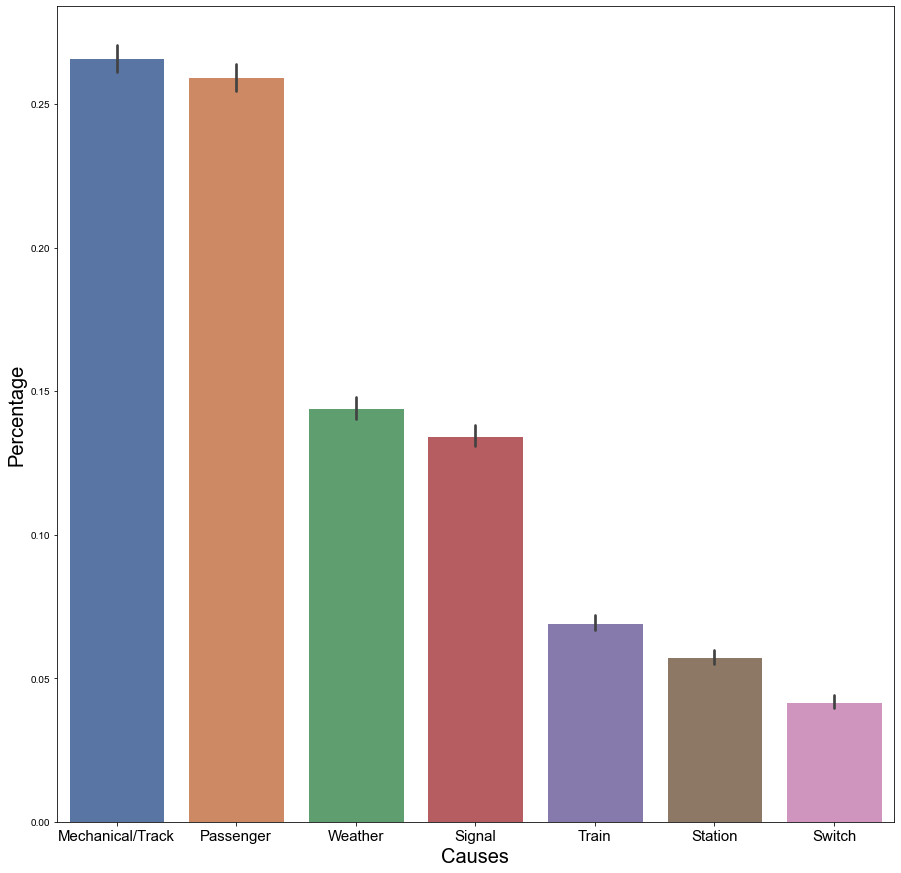

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
sns.set_theme()
ax = sns.barplot(data=div_a_causes)
ax.set_xticklabels(['Mechanical/Track','Passenger','Weather','Signal','Train',
                   'Station','Switch'],fontsize=15)
ax.set_xlabel('Causes',fontsize=20)
ax.set_ylabel('Percentage',fontsize=20);

## Causes of delays on Div B

In [10]:
div_b_causes = div_b_causes.reindex(columns=['mechanical_and_track_disruption','passenger_disruption','signal_disruption',
                                             'weather_disruption','train_disruption','switch_disruption',
                                             'station_integrity_disruption'])

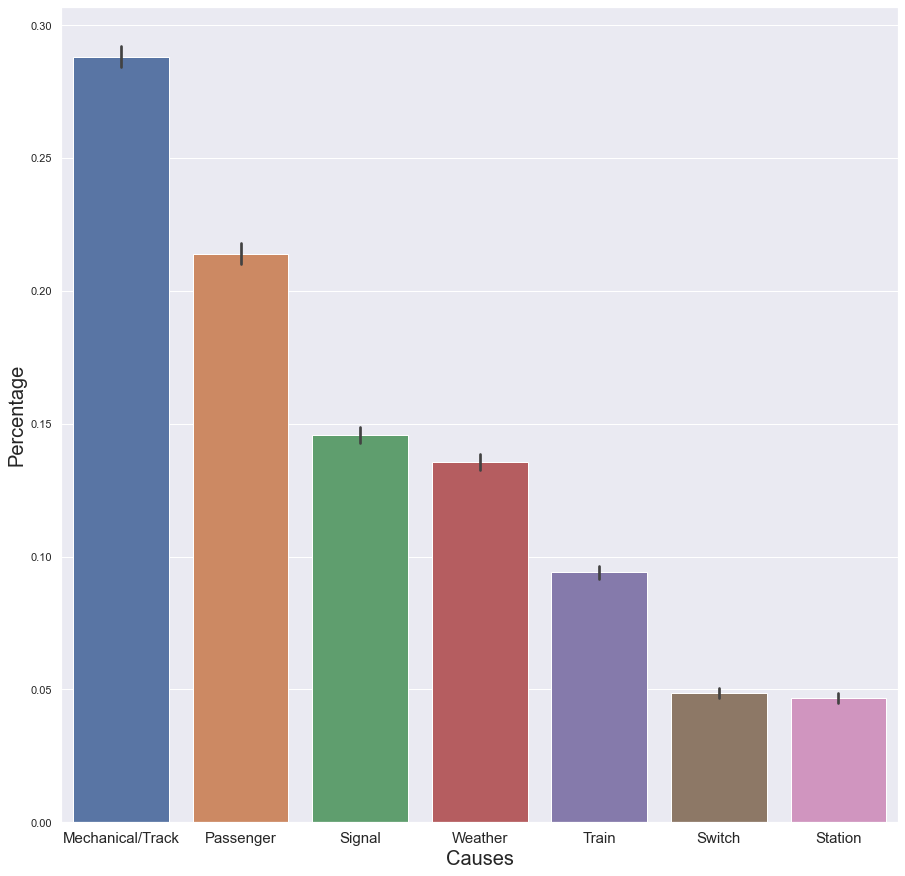

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
sns.set_theme()
ax = sns.barplot(data=div_b_causes)
ax.set_xticklabels(['Mechanical/Track','Passenger','Signal','Weather','Train',
                   'Switch','Station'],fontsize=15)
ax.set_xlabel('Causes',fontsize=20)
ax.set_ylabel('Percentage',fontsize=20);

## Causes on whole system

In [12]:
causes = causes.reindex(columns=['mechanical_and_track_disruption','passenger_disruption','signal_disruption',
                                 'weather_disruption','train_disruption','station_integrity_disruption','switch_disruption'])

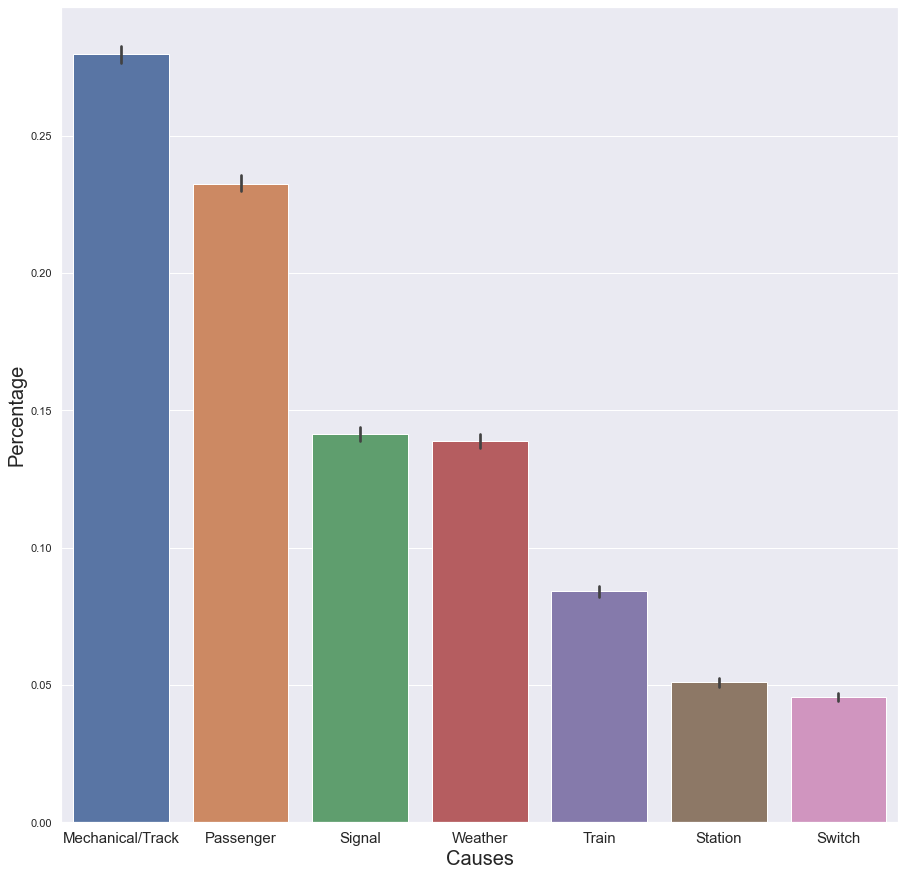

In [13]:
fig, ax = plt.subplots(figsize=(15,15))
sns.set_theme()
ax = sns.barplot(data=causes)
ax.set_xticklabels(['Mechanical/Track','Passenger','Signal','Weather','Train',
                   'Station','Switch'],fontsize=15)
ax.set_xlabel('Causes',fontsize=20)
ax.set_ylabel('Percentage',fontsize=20);

# Checking weather conditions

In [14]:
weather_cond = df[['major_conditions','minor_conditions', 'neutral_conditions', 'clear_conditions']]
weather_cond_a = df[['delayed_div_a','major_conditions', 'minor_conditions', 'neutral_conditions', 'clear_conditions']]
weather_cond_b = df[['delayed_div_b','major_conditions', 'minor_conditions', 'neutral_conditions', 'clear_conditions']]
weather_cond_a = weather_cond_a.loc[weather_cond_a['delayed_div_a']==1]
weather_cond_b = weather_cond_b.loc[weather_cond_b['delayed_div_b']==1]
weather_cond_a.drop('delayed_div_a',axis=1,inplace=True)
weather_cond_b.drop('delayed_div_b',axis=1,inplace=True)

## Div A

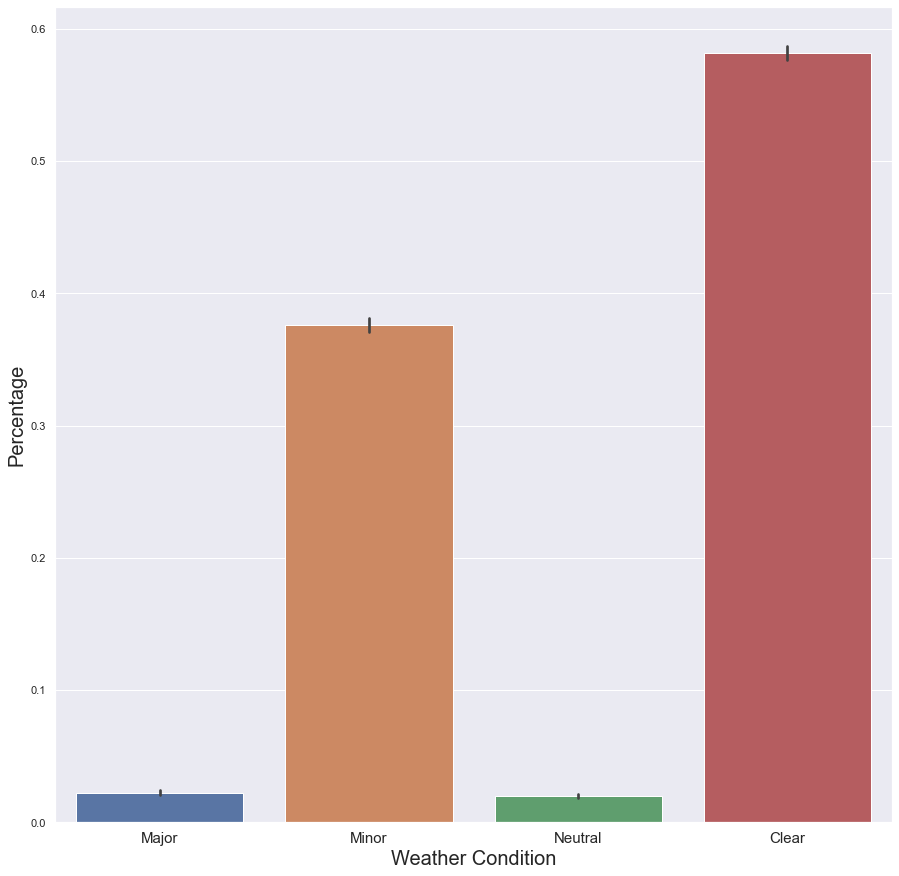

In [15]:
fig, ax = plt.subplots(figsize=(15,15))
sns.set_theme()
ax = sns.barplot(data=weather_cond_a)
ax.set_xticklabels(['Major','Minor','Neutral','Clear'],fontsize=15)
#ax.set_yticklabels(['0%', 10, 20, 30, 40, 50, '60%'],fontsize=15)
ax.set_xlabel('Weather Condition',fontsize=20)
ax.set_ylabel('Percentage',fontsize=20);

## Div B

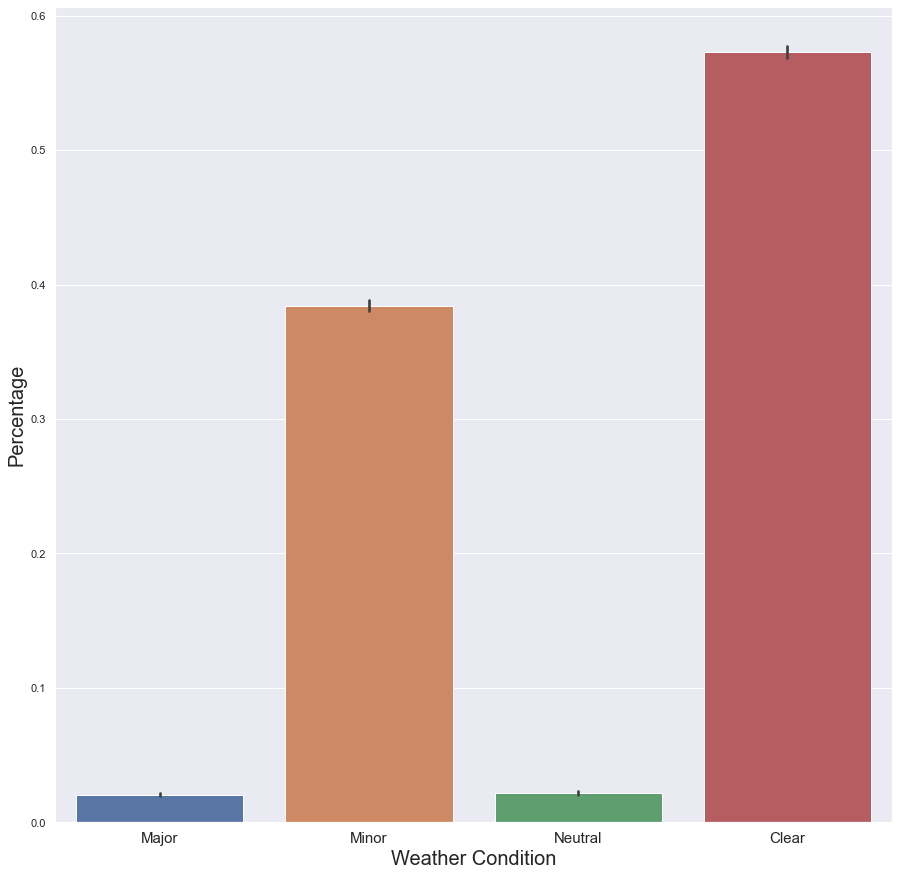

In [16]:
fig, ax = plt.subplots(figsize=(15,15))
sns.set_theme()
ax = sns.barplot(data=weather_cond_b)
ax.set_xticklabels(['Major','Minor','Neutral','Clear'],fontsize=15)
#ax.set_yticklabels(['0%', 10, 20, 30, 40, 50, '60%'],fontsize=15)
ax.set_xlabel('Weather Condition',fontsize=20)
ax.set_ylabel('Percentage',fontsize=20);

### Whole system

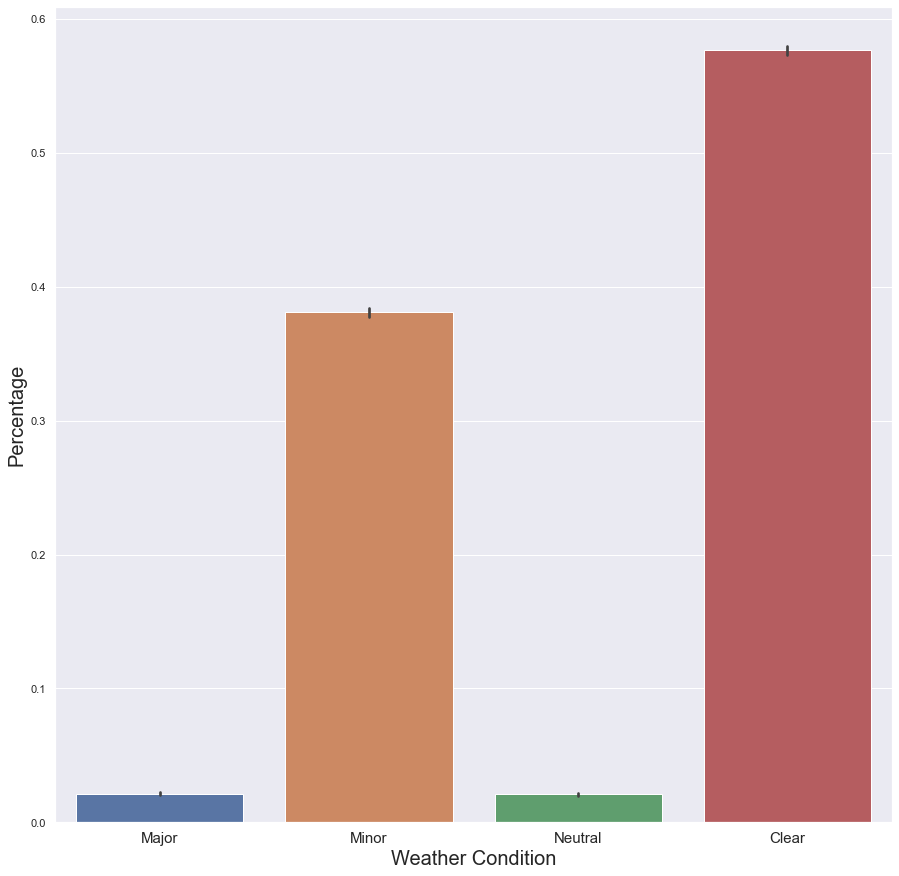

In [17]:
fig, ax = plt.subplots(figsize=(15,15))
sns.set_theme()
ax = sns.barplot(data=weather_cond)
ax.set_xticklabels(['Major','Minor','Neutral','Clear'],fontsize=15)
#ax.set_yticklabels(['0%', 10, 20, 30, 40, 50, '60%'],fontsize=15)
ax.set_xlabel('Weather Condition',fontsize=20)
ax.set_ylabel('Percentage',fontsize=20);

# Day of week

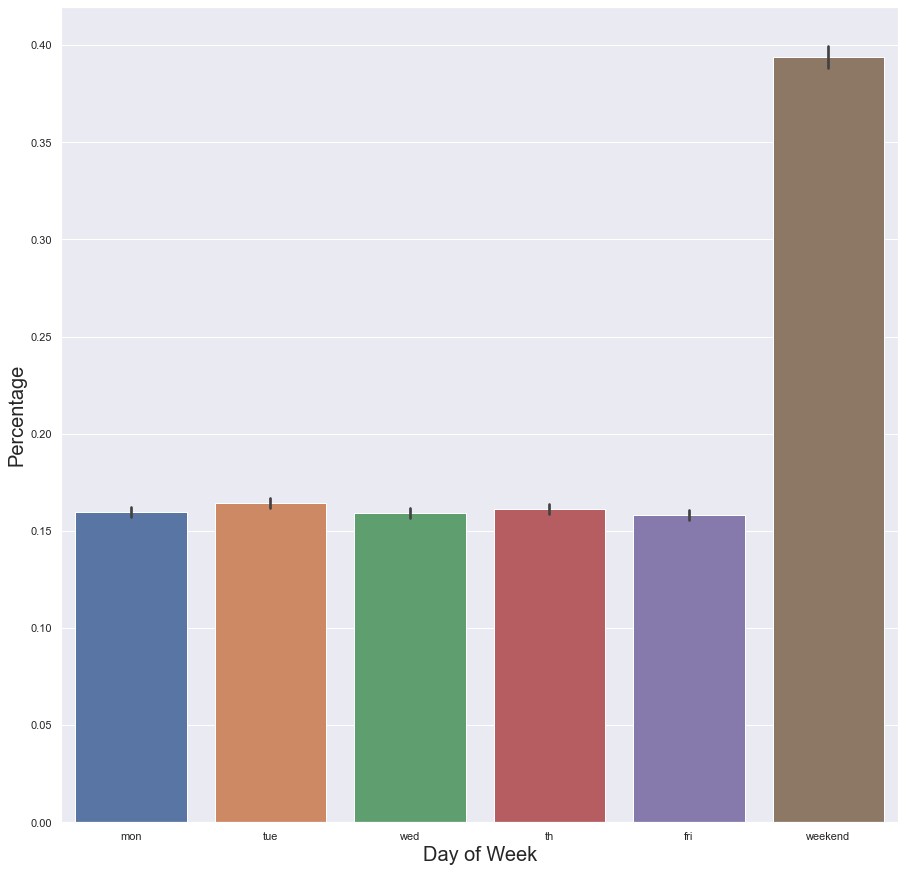

In [18]:
day = df[['mon','tue','wed','th','fri','weekend']]
fig, ax = plt.subplots(figsize=(15,15))
sns.set_theme()
ax = sns.barplot(data=day)
#ax.set_xticklabels(['mon','tue','wed','th','fri','weekend'],fontsize=15)
#ax.set_yticklabels(['0%',2.5,5,7.5,10,12.5,15,17.5,'20%'],fontsize=15)
ax.set_xlabel('Day of Week',fontsize=20)
ax.set_ylabel('Percentage',fontsize=20);

# Borough of delay

In [19]:
boro_a = df[['delayed_div_a','bronx','brooklyn','manhattan','queens']]
boro_a = boro_a.loc[boro_a['delayed_div_a']==1]
boro_a.drop('delayed_div_a',axis=1,inplace=True)
boro_b = df[['delayed_div_b','bronx','brooklyn','manhattan','queens']]
boro_b = boro_b.loc[boro_b['delayed_div_b']==1]
boro_b.drop('delayed_div_b',axis=1,inplace=True)

## Div A

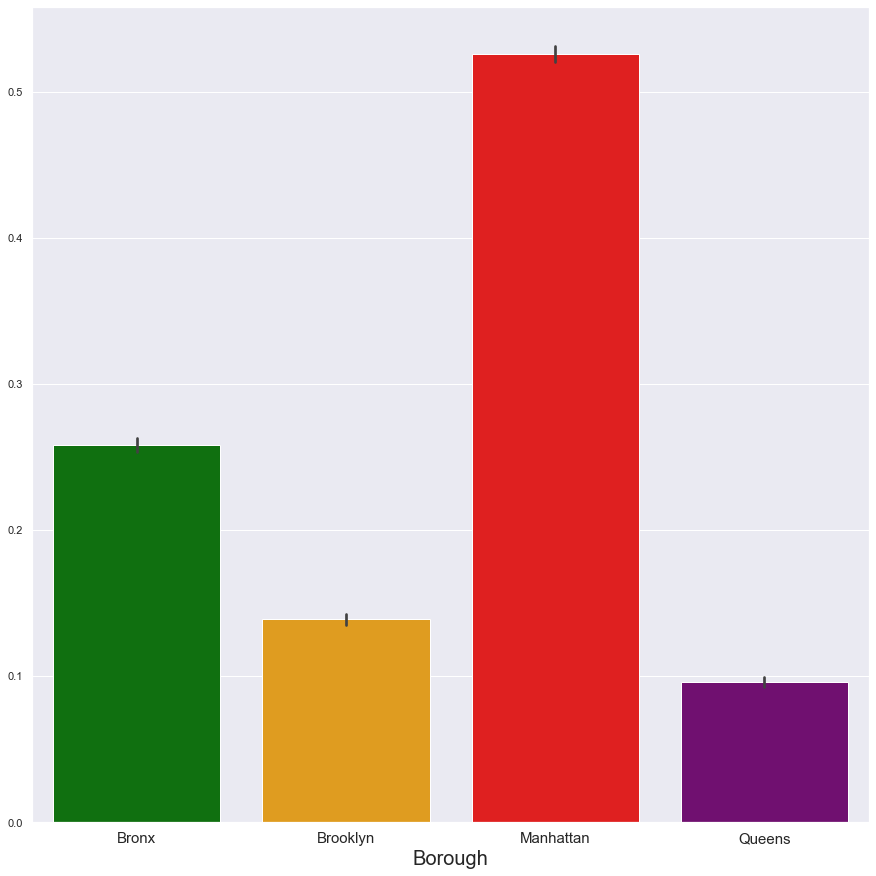

In [20]:
fig, ax = plt.subplots(figsize=(15,15))
sns.set_theme()
ax = sns.barplot(data=boro_a,palette=['green','orange','red','purple'])
ax.set_xticklabels(['Bronx','Brooklyn','Manhattan','Queens'],fontsize=15)
#ax.set_yticklabels(['0%',10,20,30,40,'50%'],fontsize=15)
ax.set_xlabel('Borough',fontsize=20);

## Div B

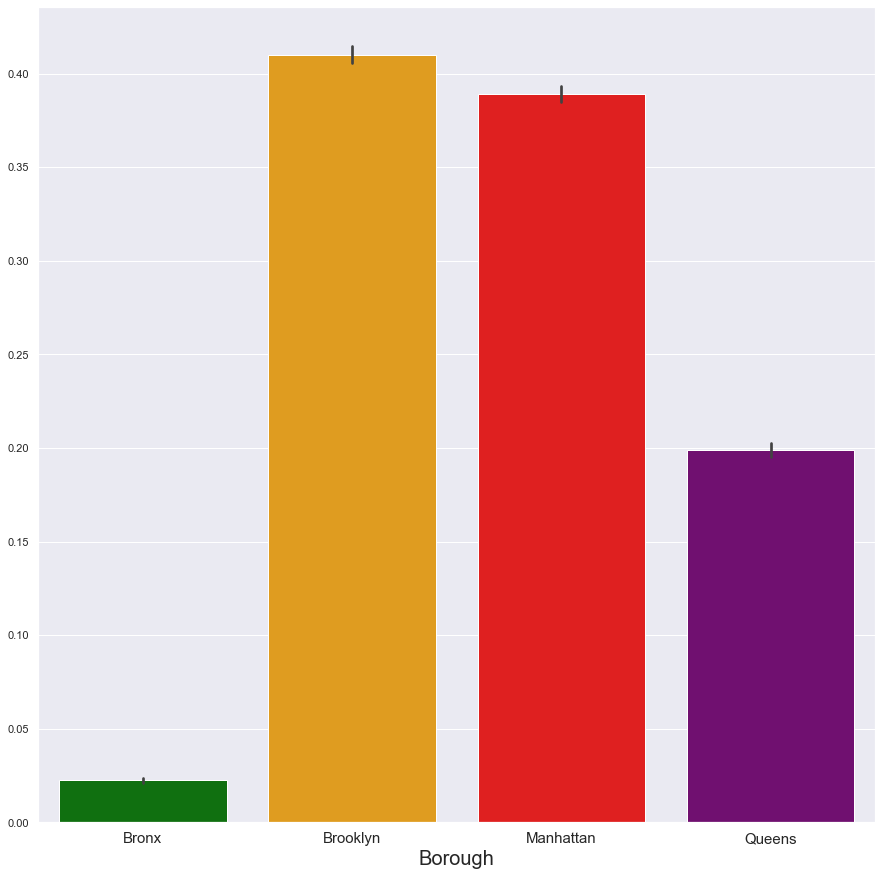

In [21]:
fig, ax = plt.subplots(figsize=(15,15))
sns.set_theme()
ax = sns.barplot(data=boro_b,palette=['green','orange','red','purple'])
ax.set_xticklabels(['Bronx','Brooklyn','Manhattan','Queens'],fontsize=15)
#ax.set_yticklabels(['0%',10,20,30,40,'50%'],fontsize=15)
ax.set_xlabel('Borough',fontsize=20);

# Time of Day/Year

## Rush Hour

In [22]:
rh = df[['rush_hour','holiday']]
rh.drop('holiday',axis=1,inplace=True)
rhdf = pd.DataFrame(rh.value_counts(),columns=['ct'])
rhdf.reset_index(inplace=True)
rhdf['rush_hour'].loc[rhdf['rush_hour']==0] = 'Not Rush Hour'
rhdf['rush_hour'].loc[rhdf['rush_hour']==1] = 'Rush Hour'
rhdf.set_index('rush_hour',inplace=True)

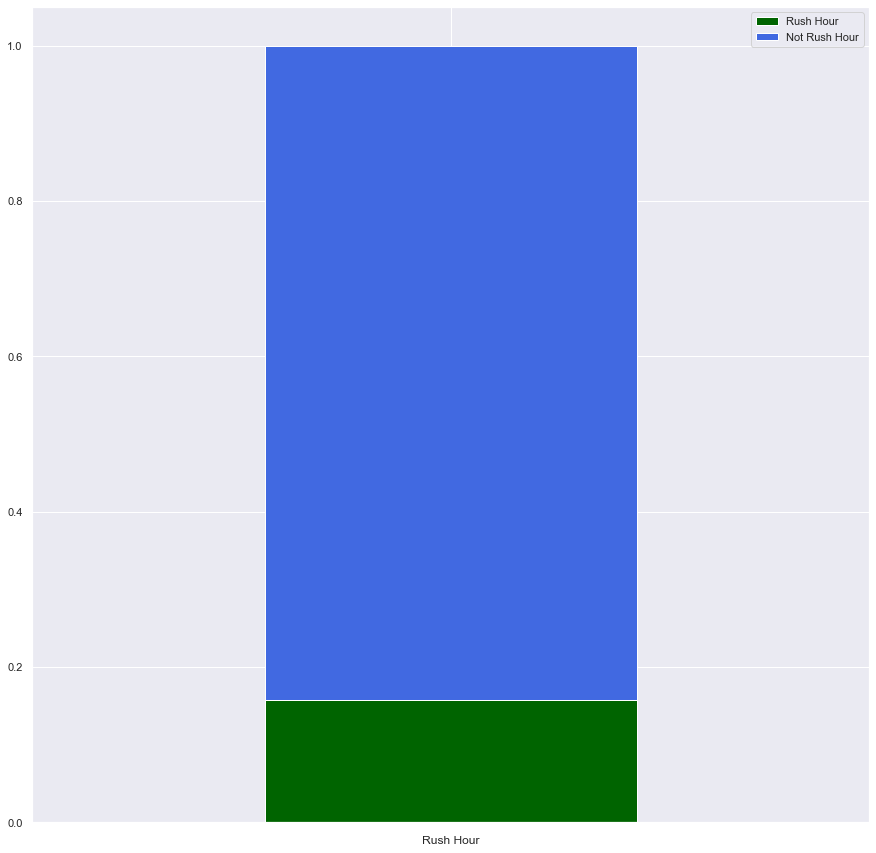

In [23]:
x = rhdf.index
y = [x[0]/sum(rhdf.values) for x in rhdf.values]

d = {x[val]:y[val] for val in range(0,len(x))}
d_sort = pd.DataFrame(dict(sorted(d.items(),key=lambda x:x[1])),index=[''])

sns.color_palette('rocket',as_cmap=True)

d_sort.plot(kind='bar',stacked=True,color=['darkgreen','royalblue'],
            xlabel='Rush Hour',width=.4,figsize=(15,15));

## Holiday

In [24]:
holi = df[['rush_hour','holiday']]
holi.drop('rush_hour',axis=1,inplace=True)
holidf = pd.DataFrame(holi.value_counts(),columns=['ct'])
holidf.reset_index(inplace=True)
holidf['holiday'].loc[holidf['holiday']==0] = 'Not Holiday'
holidf['holiday'].loc[holidf['holiday']==1] = 'Holiday'
holidf.set_index('holiday',inplace=True)

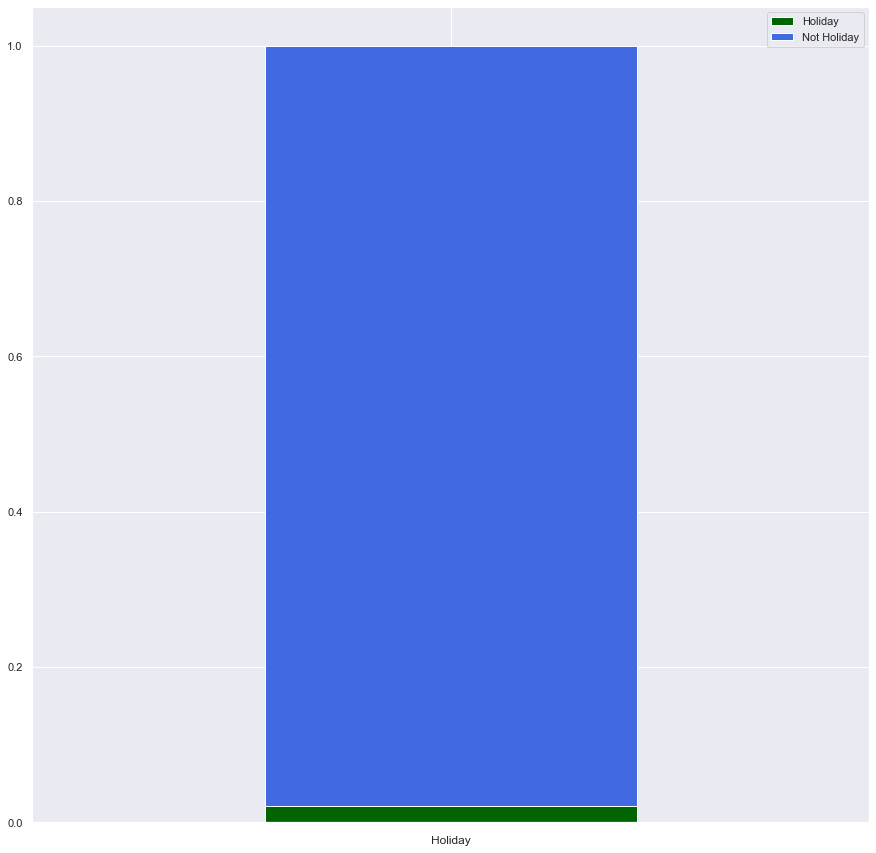

In [25]:
x = holidf.index
y = [x[0]/sum(holidf.values) for x in holidf.values]

d = {x[val]:y[val] for val in range(0,len(x))}
d_sort = pd.DataFrame(dict(sorted(d.items(),key=lambda x:x[1])),index=[''])

sns.color_palette('rocket',as_cmap=True)

d_sort.plot(kind='bar',stacked=True,color=['darkgreen','royalblue'],
            xlabel='Holiday',width=.4,figsize=(15,15));

# Ridership

In [26]:
dfr.drop('Unnamed: 0',axis=1,inplace=True)

In [27]:
dfr['median'] = dfr[['2015','2016','2017','2018','2019','2020']].median(axis=1)
top = dfr.sort_values('mean',ascending=False)[:10]
top = top[['station','mean']]

In [28]:
dfr['median'].median()

2272171.25

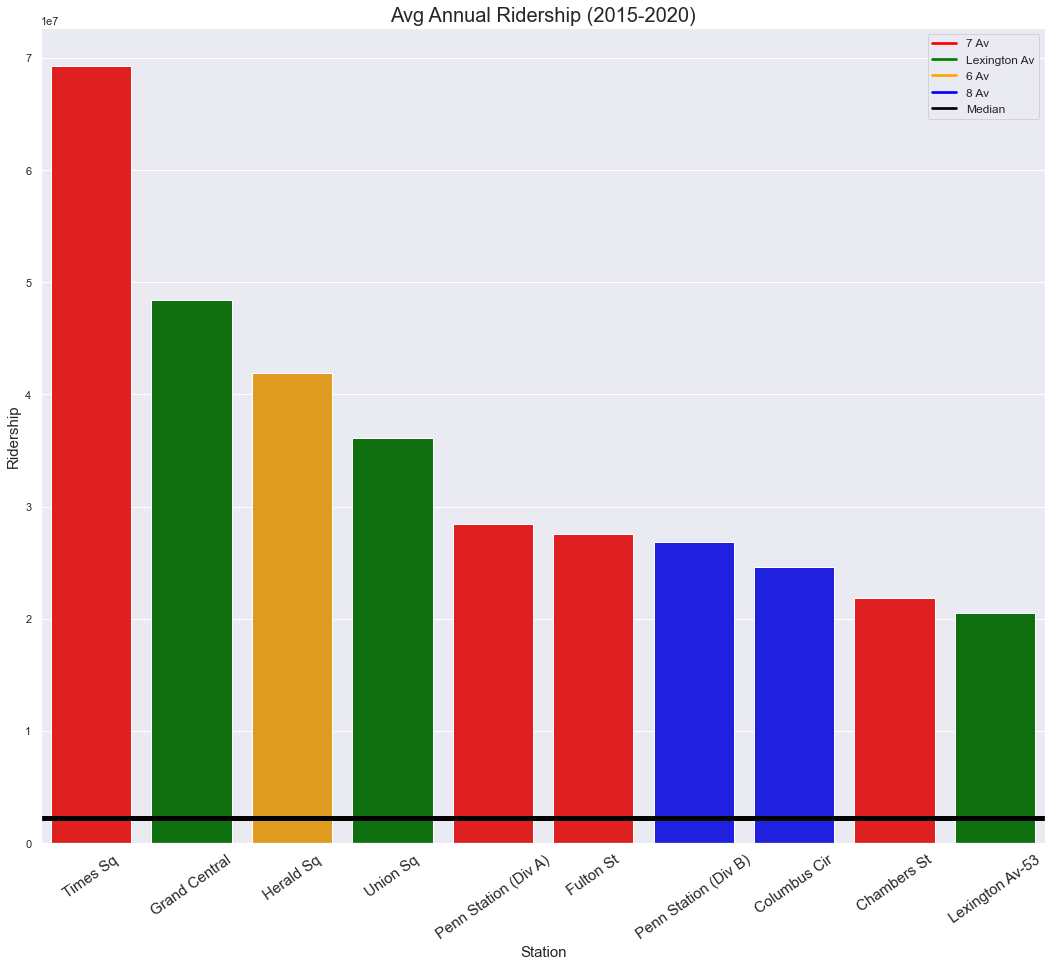

In [29]:
fig, ax = plt.subplots(figsize=(18, 15))

x = top['station']
y = top['mean']


sns.set_theme()
sns.barplot(x = x,y = y,palette=['red','green','orange','green','red','red','blue','blue','red','green']).axhline(
dfr['median'].median(),linewidth=5,color='black')
ax.set_xticklabels(labels = ['Times Sq','Grand Central','Herald Sq','Union Sq','Penn Station (Div A)',
                            'Fulton St','Penn Station (Div B)','Columbus Cir','Chambers St','Lexington Av-53']
                   ,fontsize=15,rotation=35)
ax.set_title('Avg Annual Ridership (2015-2020)',fontsize=20)
ax.set_xlabel('Station',fontsize=15)
ax.set_ylabel('Ridership',fontsize=15)
leg = ax.legend(labels=['7 Av','Lexington Av','6 Av','8 Av','Median'],loc='upper right',fontsize=12);
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('green')
leg.legendHandles[2].set_color('orange')
leg.legendHandles[3].set_color('blue')
leg.legendHandles[4].set_color('black')
plt.show();

In [30]:
bot = dfr.sort_values('mean')[:10]
bot = bot[['station','mean']]

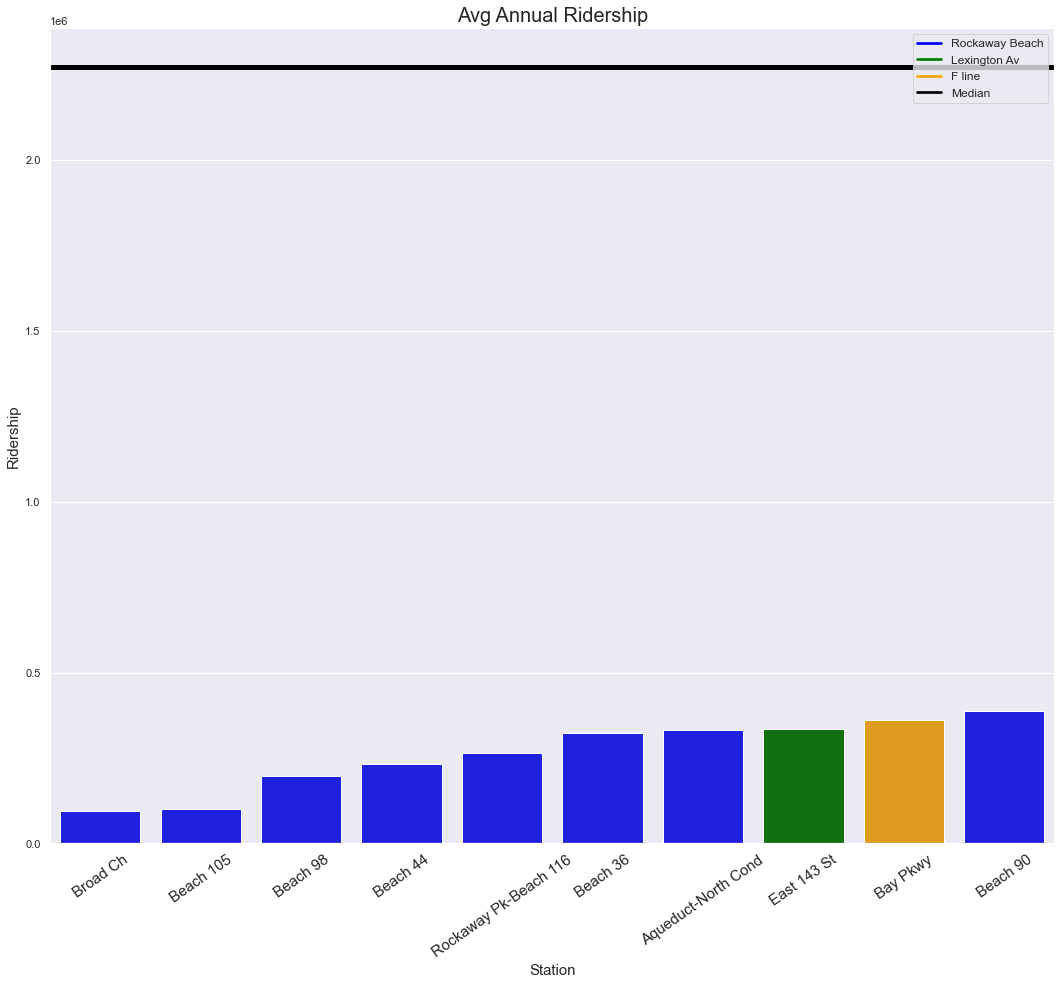

In [31]:
fig, ax = plt.subplots(figsize=(18, 15))

x = bot['station']
y = bot['mean']


sns.set_theme()
sns.barplot(x = x,y = y,palette=['blue','blue','blue','blue','blue','blue','blue','green','orange','blue']).axhline(
dfr['median'].median(),linewidth=5,color='black')
ax.set_xticklabels(labels = ['Broad Ch','Beach 105','Beach 98','Beach 44','Rockaway Pk-Beach 116',
                            'Beach 36','Aqueduct-North Cond','East 143 St','Bay Pkwy','Beach 90']
                   ,fontsize=15,rotation=35)
ax.set_title('Avg Annual Ridership',fontsize=20)
ax.set_xlabel('Station',fontsize=15)
ax.set_ylabel('Ridership',fontsize=15)
leg = ax.legend(labels=['Rockaway Beach','Lexington Av','F line','Median'],loc='upper right',fontsize=12);
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('green')
leg.legendHandles[2].set_color('orange')
leg.legendHandles[3].set_color('black')
plt.show();

In [32]:
top

,station,mean
398,Times Sq-42 St (N/Q/R/W/S/1/2/3/7)/42 St (A/C/E),6.922573e+07
281,Grand Central-42 St (S/4/5/6/7),4.838079e+07
85,34 St-Herald Sq (B/D/F/M/N/Q/R/W),4.190766e+07
26,14 St-Union Sq (L/N/Q/R/W/4/5/6),3.610168e+07
87,34 St-Penn Station (1/2/3),2.842504e+07
275,Fulton St (A/C/J/Z/2/3/4/5),2.759258e+07
88,34 St-Penn Station (A/C/E),2.683942e+07
112,59 St-Columbus Circle (A/B/C/D/1),2.461658e+07
222,Chambers St (A/C)/WTC (E)/Park Pl (2/3)/Cortla...,2.185759e+07
321,Lexington Av-53 St (E/M)/51 St (6),2.052241e+07


In [33]:
bot

,station,mean
198,Broad Channel (A/S),95838.192
178,Beach 105 St (A/S),102283.590
185,Beach 98 St (A/S),196094.000
181,Beach 44 St (A),233242.792
380,Rockaway Park-Beach 116 St (A/S),264042.598
180,Beach 36 St (A),323559.604
155,Aqueduct-North Conduit Av (A),332729.196
249,East 143 St-St Mary's St (6),336195.598
173,Bay Pkwy (F),360077.186
184,Beach 90 St (A/S),388226.602


In [34]:
dfr['median'].median()

2272171.25

Need to look into what's wrong with the Median bar.

Will also check different boroughs.